In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
# import zipfile
# with zipfile.ZipFile("/content/drive/MyDrive/ROAD SURFACE.zip","r") as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/ROAD SURFACE")


In [ ]:
import os

data = os.path.dirname(r"/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/")

In [ ]:
ImagePaths = []
for image in list(os.listdir(data)):
        ImagePaths=ImagePaths+[data+"/"+image]
ImagePaths


['/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/Final',
 '/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/normal']

In [ ]:
print(len(ImagePaths))

2


In [ ]:
IMG_SIZE=128
X=[]
y=[]
for image in ImagePaths:
  if "normal" in image:
    for i in os.listdir(image):
      try:
          img = cv2.imread(image+"/"+i,cv2.IMREAD_COLOR)
          img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

          X.append(np.array(img))
          # print(X)
          y.append('NORMAL')
      except:
          pass

  if "Final" in image:

      for i in os.listdir(image):
        try:        
            img = cv2.imread(image+"/"+i,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            y.append('POTHOLES')
        except:
          pass

In [ ]:
len(y)

1913

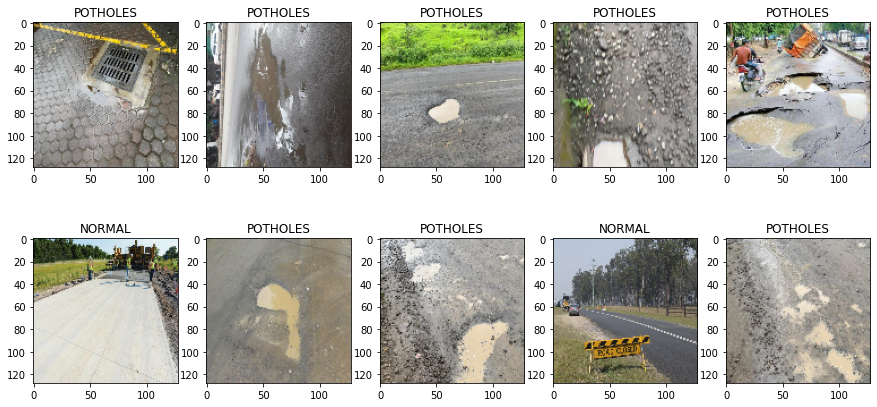

In [ ]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/100
120/120 - 62s - loss: 1.0690 - accuracy: 0.8068 - val_loss: 0.5012 - val_accuracy: 0.8288 - 62s/epoch - 514ms/step
Epoch 2/100
120/120 - 61s - loss: 0.4007 - accuracy: 0.8556 - val_loss: 0.4756 - val_accuracy: 0.7954 - 61s/epoch - 508ms/step
Epoch 3/100
120/120 - 59s - loss: 0.3347 - accuracy: 0.8745 - val_loss: 2.0702 - val_accuracy: 0.6514 - 59s/epoch - 496ms/step
Epoch 4/100
120/120 - 63s - loss: 0.4321 - accuracy: 0.8536 - val_loss: 0.2907 - val_accuracy: 0.8894 - 63s/epoch - 523ms/step
Epoch 5/100
120/120 - 58s - loss: 0.3114 - accuracy: 0.8912 - val_loss: 0.2676 - val_accuracy: 0.8894 - 58s/epoch - 485ms/step
Epoch 6/100
120/120 - 59s - loss: 0.2605 - accuracy: 0.9073 - val_loss: 0.2340 - val_accuracy: 0.9144 - 59s/epoch - 489ms/step
Epoch 7/100
120/120 - 62s - loss: 0.3588 - accuracy: 0.8717 - val_loss: 0.2594 - val_accuracy: 0.9061 - 62s/epoch - 517ms/step
Epoch 8/100
120/120 - 58s - loss: 0.2752 - accuracy: 0.8996 - val_loss: 0.2222 - val_accuracy: 0.9207 - 58s/epo

In [ ]:
import pickle
saved_model='saved_model.sav'
pickle.dump(model,open(saved_model,'wb'))

In [ ]:
import pickle
loaded_model=pickle.load(open(saved_model,'rb'))

In [ ]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss: {:2.2f}%'.format(loss*100))


15/15 [==============================] - 9s 599ms/step - loss: 0.4705 - accuracy: 0.9311
Test accuracy: 93.11%
Test loss: 47.05%


In [ ]:
prediction = loaded_model.predict(x_test)

15/15 [==============================] - 5s 320ms/step


In [ ]:
y_pred = np.argmax(prediction, axis=1)

In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        

In [ ]:
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,64,23
Actual POTHOLES,10,382


AUC score : 85.51%


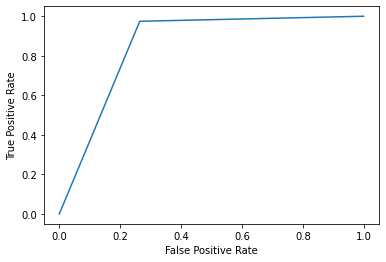

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test2, y_pred)
print('AUC score : {:2.2f}%'.format(roc_auc_score(y_test2, y_pred)*100))

In [ ]:
from sklearn.metrics import f1_score
print('F1 score : {:2.2f}%'.format(f1_score(y_test2, y_pred)*100))

F1 score : 95.86%


In [ ]:
IMG_SIZE=128
epochs=5
batches=32
X=[]
y=[]
filename=[]
for image in ImagePaths:
  if "normal" in image:
    for i in os.listdir(image):
      try:
          img = cv2.imread(image+"/"+i,cv2.IMREAD_COLOR)
          img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

          X.append(np.array(img))
          filename.append(image+"/"+i)
          # print(X)
          y.append('NORMAL')
      except:
          pass

  if "Final" in image:
      for i in os.listdir(image):
        try:
            img = cv2.imread(image+"/"+i,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            filename.append(image+"/"+i)
            y.append('POTHOLES')
        except:
          pass
        

In [ ]:
img_df = pd.DataFrame(
    {'filename': filename,
     'y': y
    })

img_df=img_df.sample(frac=1)

In [ ]:
tr_img=img_df[:450]
valid_img=img_df[450:]

In [ ]:
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/' + '/*')
newFolders=[]
for i in folders:
  if ("normal" in i) or ('Final' in i):
    newFolders.append(i)
newFolders

['/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/Final',
 '/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/normal']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(len(newFolders), activation='softmax')(x)

In [ ]:
# create a model object
model2 = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model2.compile(
loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [ ]:
test_gen = gen.flow_from_dataframe(
        dataframe=img_df,
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 1913 validated image filenames belonging to 2 classes.
{'NORMAL': 0, 'POTHOLES': 1}


In [ ]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

min: -123.027855 max: 140.93231


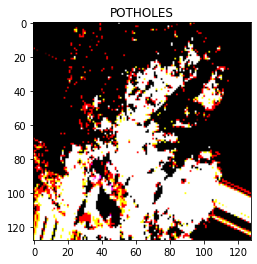

In [ ]:
try:
    for x, y in test_gen:
      print("min:", x[0].min(), "max:", x[0].max())
      plt.title(labels[np.argmax(y[0])])
      plt.imshow(x[0])
      plt.show()
      break
except:
    pass
    

In [ ]:
train_path = '/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/'
train_generator = gen.flow_from_dataframe(
        dataframe=tr_img,
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batches)

valid_generator = gen.flow_from_dataframe(
        dataframe=valid_img,
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batches)

Found 450 validated image filenames belonging to 2 classes.
Found 1463 validated image filenames belonging to 2 classes.


In [ ]:

train_img_path = '/content/drive/MyDrive/ROAD SURFACE/ROAD SURFACE/Road Surface Image/Paved Road/Pothole in Rainy Season/' + '/*/*.j*'
# fit the model
try:
    r = model.fit_generator(
          train_generator,
          validation_data=valid_generator,
          epochs=epochs,
          steps_per_epoch=len(image_files) // batches,
          validation_steps=len(valid_image_files) // batches)
except:
    pass